## Load, Format and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('german2.csv')
data_numeric = pd.read_csv('germancredit.csv', header= None)

In [3]:
# columns = data.iloc[0].tolist()

In [4]:
# data.columns = columns

In [5]:
# data = data.iloc[1:]


In [6]:
data

,account_status,duration,credit_history,purpose,credit_amount,savings_account,unemployed,installment_rate,personal_status_sex,debtors/guarantors,...,property,age,other_installment_plans,housing,credits,job,liable_for,telephone,foreign_worker,good/bad
0,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,1
1,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,2
2,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,1
3,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,1
4,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12,32,42,1736,61,74,3,92,101,...,121,31,143,152,1,172,1,191,201,1
996,11,30,32,41,3857,61,73,4,91,101,...,122,40,143,152,1,174,1,192,201,1
997,14,12,32,43,804,61,75,4,93,101,...,123,38,143,152,1,173,1,191,201,1
998,11,45,32,43,1845,61,73,4,93,101,...,124,23,143,153,1,173,1,192,201,2


In [7]:
# data.columns = ['account_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account', 'unemployed', 'installment_rate', 'personal_status_sex', 'debtors/guarantors', 'present_residence_since', 'property', 'age', 'other_installment_plans', 'housing', 'credits', 'job', 'liable_for', 'telephone', 'foreign_worker', 'good/bad']

In [8]:
# data

In [9]:
# test = data.iloc[:,1:]
# test

In [10]:
# data.columns.tolist()

In [11]:
# data

In [12]:
# a_columns = ['account_status', 'credit_history', 'purpose', 'savings_account', 'unemployed',
#      'personal_status_sex', 'debtors/guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

In [13]:
# data[a_columns] = data[a_columns].replace({'A':''}, regex=True)
# data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
account_status             1000 non-null int64
duration                   1000 non-null int64
credit_history             1000 non-null int64
purpose                    1000 non-null int64
credit_amount              1000 non-null int64
savings_account            1000 non-null int64
unemployed                 1000 non-null int64
installment_rate           1000 non-null int64
personal_status_sex        1000 non-null int64
debtors/guarantors         1000 non-null int64
present_residence_since    1000 non-null int64
property                   1000 non-null int64
age                        1000 non-null int64
other_installment_plans    1000 non-null int64
housing                    1000 non-null int64
credits                    1000 non-null int64
job                        1000 non-null int64
liable_for                 1000 non-null int64
telephone                  1000 non-null int64
f

In [15]:
# data.to_csv('german2.csv', index=False)

In [16]:
#data.dropna(axis=1, inplace=True)

## Define X and y

In [17]:
X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(1, 699), (2, 699)]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[-0.31658606 -0.30948995 -2.2860788  ... -0.418196    1.25748988
  -0.18311355]
 [ 1.29400712  0.19324133 -0.41435178 ... -0.418196    1.25748988
  -0.18311355]
 [ 1.29400712 -1.31495251  1.45737524 ... -0.418196   -0.79523503
  -0.18311355]
 ...
 [-0.31658606 -0.56085559  0.52151173 ... -0.418196   -0.79523503
  -0.18311355]
 [-0.31658606 -1.31495251 -0.41435178 ... -0.418196    1.25748988
  -0.18311355]
 [-0.31658606  1.95280082 -0.41435178 ... -0.418196   -0.79523503
  -0.18311355]]


In [22]:
print(X_test)

[[ 1.29400712  0.19324133 -0.41435178 ...  2.39122327 -0.79523503
  -0.18311355]
 [ 1.29400712  1.1987039  -0.41435178 ... -0.418196   -0.79523503
  -0.18311355]
 [ 1.29400712 -0.30948995  1.45737524 ... -0.418196   -0.79523503
  -0.18311355]
 ...
 [-1.12188265 -0.30948995 -0.41435178 ... -0.418196   -0.79523503
  -0.18311355]
 [-0.31658606  1.1987039   0.52151173 ...  2.39122327  1.25748988
  -0.18311355]
 [-1.12188265  0.19324133 -0.41435178 ... -0.418196    1.25748988
  -0.18311355]]


## Training the Random Forest Classification Model on the Training Set

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=2000, criterion ='entropy', random_state=0, oob_score=True)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000, oob_score=True,
                       random_state=0)

In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [2 2]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8714285714285714


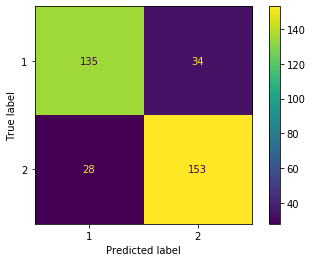

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [28]:
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)
print (classification_report(y_test, predictions,
                            target_names=["bad","good"])) 

              precision    recall  f1-score   support

         bad       0.90      0.83      0.86       169
        good       0.85      0.91      0.88       181

    accuracy                           0.87       350
   macro avg       0.87      0.87      0.87       350
weighted avg       0.87      0.87      0.87       350



In [29]:
import numpy as np
feature_names = data.columns
sorted(zip(classifier.feature_importances_, feature_names), reverse=True)

#plot with a bar graph
#try to get a better score with dropping score below .02

[(0.13790082279648108, 'credit_amount'),
 (0.10890549079075505, 'account_status'),
 (0.10385986523032117, 'age'),
 (0.09298947209705861, 'duration'),
 (0.06051648025315718, 'purpose'),
 (0.0525201617315216, 'credit_history'),
 (0.051108173861142595, 'unemployed'),
 (0.05021159329855997, 'savings_account'),
 (0.043574238725245795, 'present_residence_since'),
 (0.043284852091832596, 'property'),
 (0.04250891691175745, 'installment_rate'),
 (0.0359601670591477, 'personal_status_sex'),
 (0.03221366799448069, 'job'),
 (0.031808589611616284, 'other_installment_plans'),
 (0.02808495523625531, 'housing'),
 (0.021702191177569795, 'credits'),
 (0.02024743012548828, 'telephone'),
 (0.02004363270099274, 'debtors/guarantors'),
 (0.014172194096941728, 'liable_for'),
 (0.008387104209674293, 'foreign_worker')]